<a href="https://colab.research.google.com/github/BethanyJep/kiChanjo/blob/main/Sentiment_Analysis_on_COVID_19_vaccine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis for COVID-19 vaccine

## Reading our Data


tweets about the COVID-19 vaccines used in entire world on large scale, as following:

* Pfizer/BioNTech;
* Sinopharm;
* Sinovac;
* Moderna;
* Oxford/AstraZeneca;
* Covaxin;
* Sputnik V.

In [1]:
pip install tweet_preprocessor

In [2]:
#Getting the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import csv
import re #regular expression
from textblob import TextBlob
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from collections import Counter 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import preprocessor as p

In [3]:
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/BethanyJep/COVID-19-Vaccine-Data/main/vaccination_all_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29447 entries, 0 to 29446
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29447 non-null  int64 
 1   user_name         29447 non-null  object
 2   user_location     22597 non-null  object
 3   user_description  27387 non-null  object
 4   user_created      29447 non-null  object
 5   user_followers    29447 non-null  int64 
 6   user_friends      29447 non-null  int64 
 7   user_favourites   29447 non-null  int64 
 8   user_verified     29447 non-null  bool  
 9   date              29447 non-null  object
 10  text              29447 non-null  object
 11  hashtags          23240 non-null  object
 12  source            29425 non-null  object
 13  retweets          29447 non-null  int64 
 14  favorites         29447 non-null  int64 
 15  is_retweet        29447 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 3.2+ MB


In [6]:
df.shape

(29447, 16)

In [7]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.944700e+04,2.944700e+04,29447.000000,2.944700e+04,29447.000000,29447.000000
mean,1.362487e+18,1.162045e+05,1310.457432,1.455753e+04,3.313411,14.040310
std,8.309473e+15,9.050136e+05,6438.116313,4.046167e+04,35.640793,192.571525
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.359889e+18,1.170000e+02,141.000000,3.260000e+02,0.000000,0.000000
50%,1.365593e+18,5.680000e+02,416.000000,2.055000e+03,0.000000,1.000000
75%,1.367819e+18,2.995000e+03,1183.000000,1.086400e+04,1.000000,4.000000
max,1.371752e+18,1.487302e+07,380428.000000,1.205878e+06,2360.000000,22815.000000


In [8]:
df['user_location'].unique()

array(['La Crescenta-Montrose, CA', 'San Francisco, CA', 'Your Bed', ...,
       'Kiev, Ukraine', 'planet EARTH', 'Burlington, ON.'], dtype=object)

User location is mostly in north Aamerica. Other locations inclue Ukraine and Kiev

Text(0, 0.5, 'Frequency')

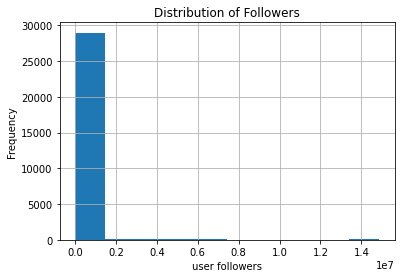

In [9]:
#Numeric categorical variable
df.hist('user_followers')
plt.title('Distribution of Followers')
plt.xlabel('user followers')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'User verification status Distribution')

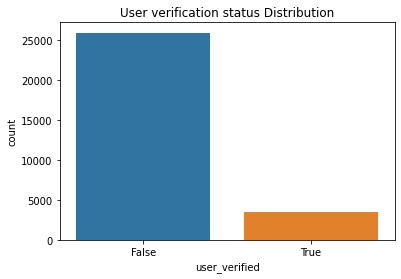

In [10]:
#Categorical Variable
sns.countplot(x='user_verified', data = df)
plt.title('User verification status Distribution')

Text(0.5, 1.0, 'whether tweet is a retweet')

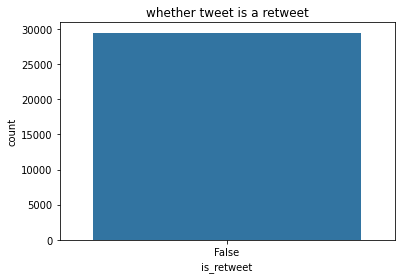

In [11]:
#Categorical Variable
sns.countplot(x='is_retweet', data = df)
plt.title('whether tweet is a retweet')

None of the tweets are retweets

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


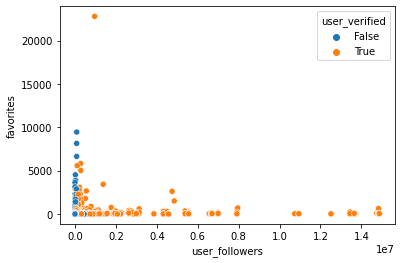

In [12]:
sns.scatterplot('user_followers', 'favorites', data=df, hue='user_verified')

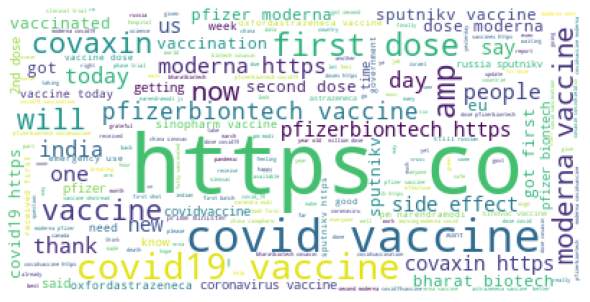

In [13]:
stopwords = set(STOPWORDS)
tweets_combo = ' '
# instantiate a word cloud object
for val in df['text']: 
          # typecaste each val to string 
    val = str(val) 
      # split the value 
    tokens = val.split() 
          # Converts each token into lowercase æææ
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    tweets_combo += " ".join(tokens)+" "

df_wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=stopwords
)
# tweets_combo
# generate the word cloud
df_wc.generate(tweets_combo)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(df_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [14]:
#removing non-english words
words = set(nltk.corpus.words.words())

def retain_eng(text):
    text  = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return text

df['text_eng'] = df['text'].apply(lambda x: retain_eng(x))
df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,text_eng
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Same said daikon paste could treat a storm # :...
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,While the world been on the wrong side of hist...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,# # # # # # Covid_19 vaccine is to last 2 - 4 ...
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,"are immutable , Senator , even when you ' re n..."
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Explain to me again why we need a vaccine @ @ ...
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False,Does anyone have any useful advice / guidance ...
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,it is a bit sad to claim the fame for success ...
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,There have not been many bright days in 2020 b...
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,Covid vaccine ; You getting it ? # # covid19 # #
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,"# will start getting # COVID19Vaccine , # US #..."


In [15]:
#using text preprocessor to clean data
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION, p.OPT.HASHTAG, 	p.OPT.SMILEY)

def pre_proc(text):
    text = p.clean(text)
    return text

df['text_clean'] = df['text_eng'].apply(lambda x: pre_proc(x))
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,text_eng,text_clean
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Same said daikon paste could treat a storm # :...,Same said daikon paste could treat a storm ://...
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,While the world been on the wrong side of hist...,While the world been on the wrong side of hist...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,# # # # # # Covid_19 vaccine is to last 2 - 4 ...,Covid_19 vaccine is to last 2 - 4 :// t . / ie...
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,"are immutable , Senator , even when you ' re n...","are immutable , Senator , even when you ' re n..."
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Explain to me again why we need a vaccine @ @ ...,Explain to me again why we need a vaccine :// ...


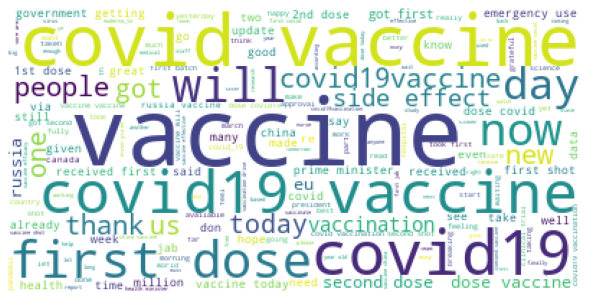

In [16]:
stopwords = set(STOPWORDS)
tweets_combo = ' '
# instantiate a word cloud object
for val in df['text_clean']: 
          # typecaste each val to string 
    val = str(val) 
      # split the value 
    tokens = val.split() 
          # Converts each token into lowercase æææ
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    tweets_combo += " ".join(tokens)+" "

df_wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=stopwords
)
# tweets_combo
# generate the word cloud
df_wc.generate(tweets_combo)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(df_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()